# *KUIS MANDIRI*


## **Data Science: Analysis Home Medical Health Visits using EDA method**

### Pendahuluan

*Nama Mahasiswa: Intan Amelia Sari (2019104596)*

Data: https://drive.google.com/file/d/1yUyZ34K1RkyiHtJGx4B_toxR-gK6Z7m0/view?usp=sharing

### Latar Belakang

Ini adalah Analisis Data Eksplorasi awal untuk kumpulan data Kunjungan Medis Rumah yang dirilis dalam konteks Hack&Health 2018.

# Data Acquisition
Melakukan import library yang dibutuhkan untuk proses penelitian ini yang menggunakan bahasa pemograman Python 3.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

# Extract Raw Data from CSV
Melakukan ekstrak data dari data csv menjadi sebuah data frame.

### Menampilkan 5 data teratas 

In [ ]:
df = pd.read_csv('Hack2018_ES.csv', delimiter = ",");
df.head(5)

,estado,tiempo_demora,poblacion,id_poblacion,edad_valor,cp,latitude_corregida,longitud_corregida,patologia,Fecha,id_tipo,id_personal,nasistencias,menor,Geopoint_corregido
0,5,15,Parets del Vall�s,76,0.0,8150.0,"41,565505","2,234999575",LARINGITIS AGUDA,11/3/17 20:18,1,38,1,2,POINT(2.2349995750000695 41.565505000000044)
1,5,0,Sant Cugat,26,0.0,8173.0,"41,47367","2,08933",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.089330000000046 41.47367000000008)
2,4,15,Sant Cugat,26,0.0,8173.0,"41,46767","2,09033",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.0903300000000464 41.467670000000076)
3,4,15,Sabadell,19,0.0,8203.0,"41,53951204","2,122511839",LARINGITIS AGUDA,30/9/16 21:02,1,38,1,2,POINT(2.1225118390000306 41.53951204100007)
4,4,15,Sabadell,19,0.0,8203.0,"41,54251204","2,118511839",LARINGITIS AGUDA,6/4/17 16:33,1,38,1,2,POINT(2.1185118390000306 41.54251204100007)


### Menampilkan 5 data terbawah

In [ ]:
df.tail()

,estado,tiempo_demora,poblacion,id_poblacion,edad_valor,cp,latitude_corregida,longitud_corregida,patologia,Fecha,id_tipo,id_personal,nasistencias,menor,Geopoint_corregido
40074,4,90,l'Ametlla del Vall�s,122,36.0,8480.0,"41,66383944","2,262655",VIRIASIS,28/11/16 16:53,1,29,1,2,POINT(2.2626550000000707 41.66383943800004)
40075,8,0,l'Ametlla del Vall�s,122,36.0,8480.0,"41,66883944","2,255655",VIRIASIS,28/11/16 16:32,1,27,1,2,POINT(2.2556550000000706 41.66883943800004)
40076,8,0,l'Ametlla del Vall�s,122,36.0,8480.0,"41,66283944","2,261655",VIRIASIS,28/11/16 16:32,1,27,1,2,POINT(2.261655000000071 41.66283943800004)
40077,8,0,l'Ametlla del Vall�s,122,36.0,8480.0,"41,66883944","2,255655",VIRIASIS,28/11/16 16:31,1,27,1,2,POINT(2.2556550000000706 41.66883943800004)
40078,4,60,Terrassa,42,40.0,8224.0,"41,56845821","1,995854739",GRIPE,30/1/18 9:09,1,69,1,2,POINT(1.9958547392520782 41.568458212880145)


### Melihat tipe data dari setiap fitur.

In [ ]:
df.dtypes

estado                  int64
tiempo_demora           int64
poblacion              object
id_poblacion            int64
edad_valor            float64
cp                    float64
latitude_corregida     object
longitud_corregida     object
patologia              object
Fecha                  object
id_tipo                 int64
id_personal             int64
nasistencias            int64
menor                   int64
Geopoint_corregido     object
dtype: object

### Melihat total baris dan fitur.

In [ ]:
print("Total", dataFrame.shape)
print("Dari code diatas dapat diartikan bahwa data memiliki total 40.079 baris dan 15 fitur dari data ini.")

Total (40079, 15)
Dari code diatas dapat diartikan bahwa data memiliki total 40.079 baris dan 15 fitur dari data ini.


# Data Preprocessing 

## Data Integration

Pada tahap ini saya melakukan rename fitur untuk memudahkan pembacaan. Karena semua fitur menggunakan bahasa *spanish*, sehingga semua fitur di rename menjadi bahasa *inggris*.

In [ ]:
# Rename fitur
df = df.rename(columns={
    "estado": "visit status", "tiempo_demora": "time delay", "poblacion": "city", "id_poblacion": "city_id", "edad_valor": "age", "cp": "code", "latitude_corregida": "latitude", "longitud_corregida": "longitude", "patologia": "pathology", "Fecha": "date", "id_tipo": "type_id", "id_personal": "personal_id", "nasistencias": "non attendance", "menor": "minor", "Geopoint_corregido": "corrected geopoint"
    })
df.head(5)

,visit status,time delay,city,city_id,age,code,latitude,longitude,pathology,date,type_id,personal_id,non attendance,minor,corrected geopoint
0,5,15,Parets del Vall�s,76,0.0,8150.0,"41,565505","2,234999575",LARINGITIS AGUDA,11/3/17 20:18,1,38,1,2,POINT(2.2349995750000695 41.565505000000044)
1,5,0,Sant Cugat,26,0.0,8173.0,"41,47367","2,08933",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.089330000000046 41.47367000000008)
2,4,15,Sant Cugat,26,0.0,8173.0,"41,46767","2,09033",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.0903300000000464 41.467670000000076)
3,4,15,Sabadell,19,0.0,8203.0,"41,53951204","2,122511839",LARINGITIS AGUDA,30/9/16 21:02,1,38,1,2,POINT(2.1225118390000306 41.53951204100007)
4,4,15,Sabadell,19,0.0,8203.0,"41,54251204","2,118511839",LARINGITIS AGUDA,6/4/17 16:33,1,38,1,2,POINT(2.1185118390000306 41.54251204100007)


## Menghilangkan Data Duplikat
Sebelum menghapus saya memiliki 40.079 baris data tetapi setelah menghapus data duplikat, data saya haya tinggal 40.077 yang berarti bahwa data ini hanya memiliki 2 data duplikat.

In [ ]:
df.shape

(40079, 15)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (2, 15)


In [ ]:
df.count()

visit status          40079
time delay            40079
city                  40079
city_id               40079
age                   40022
code                  40077
latitude              40079
longitude             40079
pathology             40079
date                  40079
type_id               40079
personal_id           40079
non attendance        40079
minor                 40079
corrected geopoint    40079
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.head(10)

,visit status,time delay,city,city_id,age,code,latitude,longitude,pathology,date,type_id,personal_id,non attendance,minor,corrected geopoint
0,5,15,Parets del Vall�s,76,0.0,8150.0,"41,565505","2,234999575",LARINGITIS AGUDA,11/3/17 20:18,1,38,1,2,POINT(2.2349995750000695 41.565505000000044)
1,5,0,Sant Cugat,26,0.0,8173.0,"41,47367","2,08933",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.089330000000046 41.47367000000008)
2,4,15,Sant Cugat,26,0.0,8173.0,"41,46767","2,09033",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.0903300000000464 41.467670000000076)
3,4,15,Sabadell,19,0.0,8203.0,"41,53951204","2,122511839",LARINGITIS AGUDA,30/9/16 21:02,1,38,1,2,POINT(2.1225118390000306 41.53951204100007)
4,4,15,Sabadell,19,0.0,8203.0,"41,54251204","2,118511839",LARINGITIS AGUDA,6/4/17 16:33,1,38,1,2,POINT(2.1185118390000306 41.54251204100007)
5,4,15,Terrassa,44,0.0,8226.0,"41,5798696","2,0297775",LARINGITIS AGUDA,5/5/17 21:56,1,38,1,2,POINT(2.0297775000000606 41.57986959800003)
6,5,15,Vilanova del Vall�s,90,0.0,8410.0,"41,55744","2,313326411",LARINGITIS AGUDA,19/11/17 11:53,1,38,1,2,POINT(2.3133264110000527 41.557440000000035)
7,4,90,Sant Cugat,26,0.0,8173.0,"41,46967","2,09133",LARINGITIS AGUDA,29/12/17 20:16,1,82,1,2,POINT(2.0913300000000463 41.46967000000008)
8,4,15,Sabadell,22,0.0,8206.0,"41,56335","2,082978712",LARINGITIS AGUDA,4/12/16 16:17,1,38,1,2,POINT(2.0829787120000227 41.563350000000035)
9,4,15,Sant Cugat,27,0.0,8174.0,"41,47067","2,08933",LARINGITIS AGUDA,22/12/17 19:05,1,38,1,2,POINT(2.089330000000046 41.47067000000008)


In [ ]:
df.shape

(40077, 15)

## Dropping nilai yang hilang atau null.

In [ ]:
print(df.isnull().sum())

visit status           0
time delay             0
city                   0
city_id                0
age                   57
code                   2
latitude               0
longitude              0
pathology              0
date                   0
type_id                0
personal_id            0
non attendance         0
minor                  0
corrected geopoint     0
dtype: int64


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

visit status          40018
time delay            40018
city                  40018
city_id               40018
age                   40018
code                  40018
latitude              40018
longitude             40018
pathology             40018
date                  40018
type_id               40018
personal_id           40018
non attendance        40018
minor                 40018
corrected geopoint    40018
dtype: int64

In [ ]:
print(df.isnull().sum())   # After dropping the values

visit status          0
time delay            0
city                  0
city_id               0
age                   0
code                  0
latitude              0
longitude             0
pathology             0
date                  0
type_id               0
personal_id           0
non attendance        0
minor                 0
corrected geopoint    0
dtype: int64


In [ ]:
df.head(5)

,visit status,time delay,city,city_id,age,code,latitude,longitude,pathology,date,type_id,personal_id,non attendance,minor,corrected geopoint
0,5,15,Parets del Vall�s,76,0.0,8150.0,"41,565505","2,234999575",LARINGITIS AGUDA,11/3/17 20:18,1,38,1,2,POINT(2.2349995750000695 41.565505000000044)
1,5,0,Sant Cugat,26,0.0,8173.0,"41,47367","2,08933",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.089330000000046 41.47367000000008)
2,4,15,Sant Cugat,26,0.0,8173.0,"41,46767","2,09033",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.0903300000000464 41.467670000000076)
3,4,15,Sabadell,19,0.0,8203.0,"41,53951204","2,122511839",LARINGITIS AGUDA,30/9/16 21:02,1,38,1,2,POINT(2.1225118390000306 41.53951204100007)
4,4,15,Sabadell,19,0.0,8203.0,"41,54251204","2,118511839",LARINGITIS AGUDA,6/4/17 16:33,1,38,1,2,POINT(2.1185118390000306 41.54251204100007)


# Data Descriptive

### Five Number Summary 
Menampilkan Nilai Miniminum, Maksimum, Mean, Median, Q1, Q3

In [ ]:
df.describe()

,visit status,time delay,city_id,age,code,type_id,personal_id,non attendance,minor
count,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.0,40018.000000,40018.0,40018.000000
mean,4.145185,68.025638,69.142011,32.753986,8378.841121,1.0,54.692064,1.0,1.648733
std,0.650908,40.360040,50.832447,26.230858,310.848193,0.0,19.130127,0.0,0.477372
min,4.000000,0.000000,1.000000,-5.000000,8004.000000,1.0,0.000000,1.0,1.000000
25%,4.000000,45.000000,26.000000,8.000000,8186.000000,1.0,44.000000,1.0,1.000000
50%,4.000000,60.000000,50.000000,32.000000,8222.000000,1.0,55.000000,1.0,2.000000
75%,4.000000,90.000000,114.000000,51.000000,8530.000000,1.0,68.000000,1.0,2.000000
max,8.000000,150.000000,194.000000,106.000000,8990.000000,1.0,102.000000,1.0,2.000000


### Modus 

In [ ]:
df.mode()

,visit status,time delay,city,city_id,age,code,latitude,longitude,pathology,date,type_id,personal_id,non attendance,minor,corrected geopoint
0,4.0,60.0,Sant Cugat,26.0,2.0,8173.0,"41,46767","2,08633",FIEBRE,21/1/18 18:01,1.0,66.0,1.0,2.0,POINT(2.089330000000046 41.47067000000008)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT(2.0913300000000463 41.47167000000008)


### Mean

In [ ]:
df.mean()

visit status         4.145185
time delay          68.025638
city_id             69.142011
age                 32.753986
code              8378.841121
type_id              1.000000
personal_id         54.692064
non attendance       1.000000
minor                1.648733
dtype: float64

### Median 

In [ ]:
df.median()

visit status         4.0
time delay          60.0
city_id             50.0
age                 32.0
code              8222.0
type_id              1.0
personal_id         55.0
non attendance       1.0
minor                2.0
dtype: float64

# Histogram

In [ ]:
df.head()

,visit status,time delay,city,city_id,age,code,latitude,longitude,pathology,date,type_id,personal_id,non attendance,minor,corrected geopoint
0,5,15,Parets del Vall�s,76,0.0,8150.0,"41,565505","2,234999575",LARINGITIS AGUDA,11/3/17 20:18,1,38,1,2,POINT(2.2349995750000695 41.565505000000044)
1,5,0,Sant Cugat,26,0.0,8173.0,"41,47367","2,08933",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.089330000000046 41.47367000000008)
2,4,15,Sant Cugat,26,0.0,8173.0,"41,46767","2,09033",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.0903300000000464 41.467670000000076)
3,4,15,Sabadell,19,0.0,8203.0,"41,53951204","2,122511839",LARINGITIS AGUDA,30/9/16 21:02,1,38,1,2,POINT(2.1225118390000306 41.53951204100007)
4,4,15,Sabadell,19,0.0,8203.0,"41,54251204","2,118511839",LARINGITIS AGUDA,6/4/17 16:33,1,38,1,2,POINT(2.1185118390000306 41.54251204100007)


### Kota manakah yang penduduknya banyak melakukan **Home Medical Visits** ?

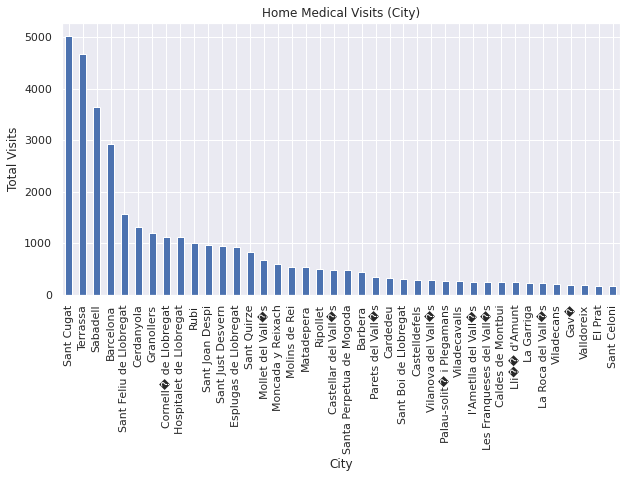

In [ ]:
df.city.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Home Medical Visits (City)")
plt.xlabel('City')
plt.ylabel('Total Visits');

- Menurut data Histogram diatas, Kota "Sant Cugat" merupakan kota yang penduduknya paling banyak melakukan Home Medical Visits. 

### Apakah umur adalah penentu bagi penduduk untuk melakukan **Home Medical Visits** ? 

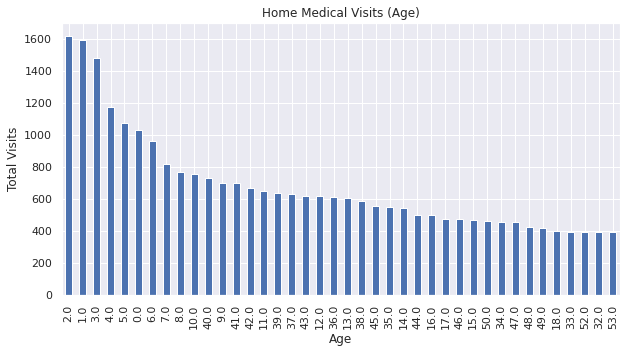

In [ ]:
df.age.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Home Medical Visits (Age)")
plt.xlabel('Age')
plt.ylabel('Total Visits');

- Dari data Histogram diatas, yang paling banyak melakukan Home Medical Visits adalah penduduk usia dibawah 10 tahun. Hal tersebut disebabkan karena usia 10 tahun kebawah masih rentan, sehingga para orang tua memutuskan untuk memanggil tenaga medis kerumah. 

### Penyakit yang paling banyak dialami oleh pasien Home Medical Visits 

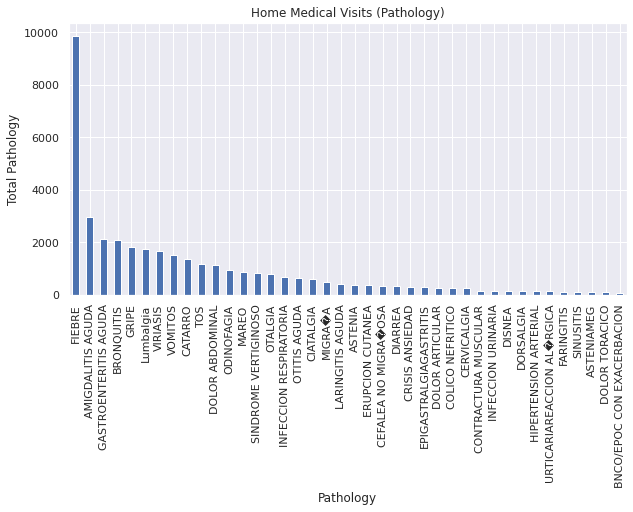

In [ ]:
df.pathology.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Home Medical Visits (Pathology)")
plt.xlabel('Pathology')
plt.ylabel('Total Pathology');

- Sebagian besar pasien Home Visits mengalami sakit demam yang hampir mencapai 10000 pasien. 

# Scatter Plot

In [ ]:
df.head()

,visit status,time delay,city,city_id,age,code,latitude,longitude,pathology,date,type_id,personal_id,non attendance,minor,corrected geopoint
0,5,15,Parets del Vall�s,76,0.0,8150.0,"41,565505","2,234999575",LARINGITIS AGUDA,11/3/17 20:18,1,38,1,2,POINT(2.2349995750000695 41.565505000000044)
1,5,0,Sant Cugat,26,0.0,8173.0,"41,47367","2,08933",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.089330000000046 41.47367000000008)
2,4,15,Sant Cugat,26,0.0,8173.0,"41,46767","2,09033",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.0903300000000464 41.467670000000076)
3,4,15,Sabadell,19,0.0,8203.0,"41,53951204","2,122511839",LARINGITIS AGUDA,30/9/16 21:02,1,38,1,2,POINT(2.1225118390000306 41.53951204100007)
4,4,15,Sabadell,19,0.0,8203.0,"41,54251204","2,118511839",LARINGITIS AGUDA,6/4/17 16:33,1,38,1,2,POINT(2.1185118390000306 41.54251204100007)


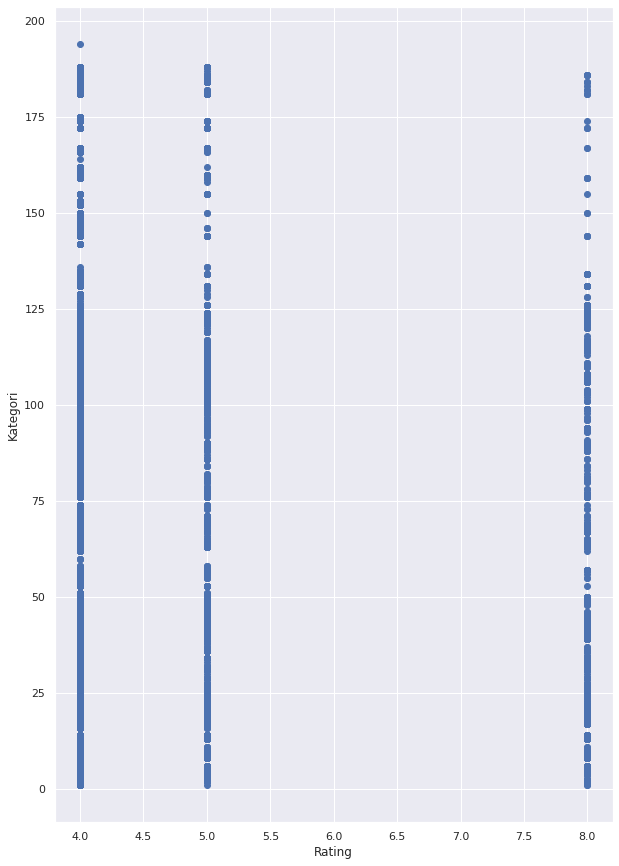

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))
ax.scatter(df['visit status'], df['city_id'])
ax.set_xlabel('Rating')
ax.set_ylabel('Kategori')
plt.show()

In [ ]:
df.dtypes

visit status            int64
time delay              int64
city                   object
city_id                 int64
age                   float64
code                  float64
latitude               object
longitude              object
pathology              object
date                   object
type_id                 int64
personal_id             int64
non attendance          int64
minor                   int64
corrected geopoint     object
dtype: object

# Bar Chart

### Define Function

In [ ]:
# Define Function

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
df.head()

,visit status,time delay,city,city_id,age,code,latitude,longitude,pathology,date,type_id,personal_id,non attendance,minor,corrected geopoint
0,5,15,Parets del Vall�s,76,0.0,8150.0,"41,565505","2,234999575",LARINGITIS AGUDA,11/3/17 20:18,1,38,1,2,POINT(2.2349995750000695 41.565505000000044)
1,5,0,Sant Cugat,26,0.0,8173.0,"41,47367","2,08933",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.089330000000046 41.47367000000008)
2,4,15,Sant Cugat,26,0.0,8173.0,"41,46767","2,09033",LARINGITIS AGUDA,9/2/17 20:13,1,38,1,2,POINT(2.0903300000000464 41.467670000000076)
3,4,15,Sabadell,19,0.0,8203.0,"41,53951204","2,122511839",LARINGITIS AGUDA,30/9/16 21:02,1,38,1,2,POINT(2.1225118390000306 41.53951204100007)
4,4,15,Sabadell,19,0.0,8203.0,"41,54251204","2,118511839",LARINGITIS AGUDA,6/4/17 16:33,1,38,1,2,POINT(2.1185118390000306 41.54251204100007)


### Saat Home Medical Visits, kota manakah yang paling sering terlambat dalam kunjungan ? 

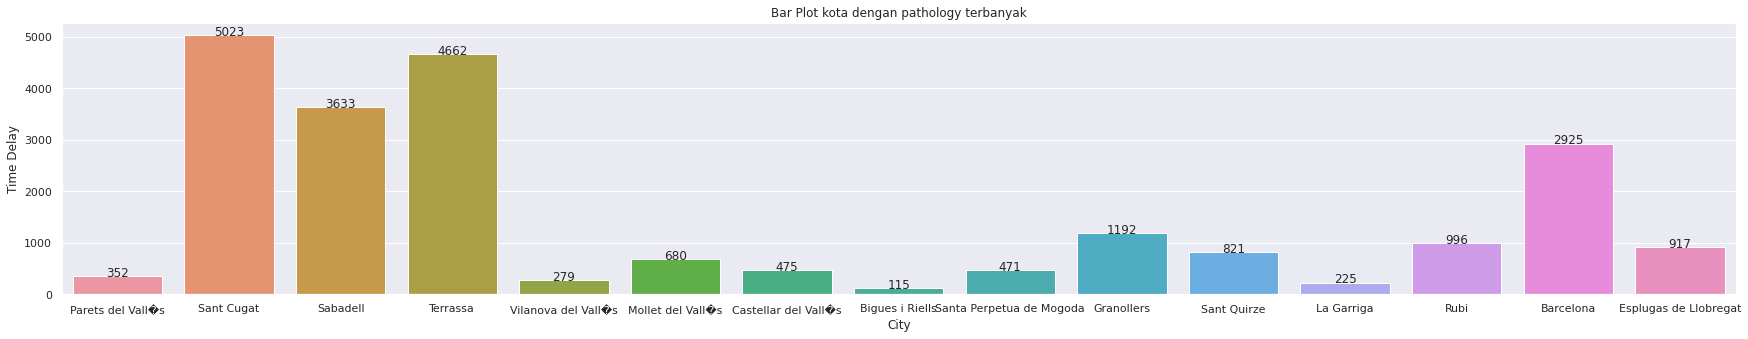

In [ ]:
datanew = df["city"].unique()
data = []

for c in datanew:
    d = df[df["city"] == c]
    counts = d["time delay"].count()
    data.append([c, counts])
    
data = pd.DataFrame(data, columns = ["City", "Time Delay"])
get= data.head(15)

plt.figure(figsize=(30,5))
plt.title("Bar Plot kota dengan pathology terbanyak")

ax = sns.barplot(x="City", y="Time Delay", data=get)
        
show_values_on_bars(ax, "v", 0.10)

Mengingat Kota Sant Cugat adalah kota yang penduduknya paling banyak melakukan Home Medical Visits sehingga kota tersebut juga yang paling berpeluang paling banyak mengalami keterlambatan kunjungan *(Berbanding lurus antara pengguna Home Medical Visit dengan Time Delay)*

# Pie Chart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


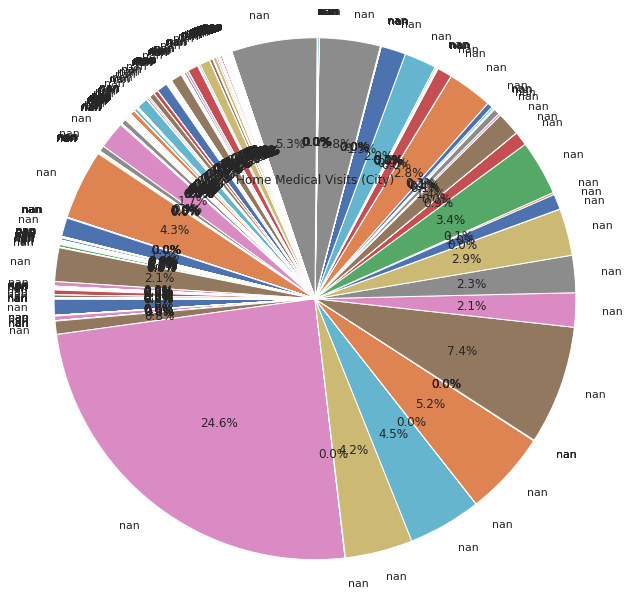

In [ ]:
datacity = df["city"].unique()

for s in datacity:
    tot = df["city"].str.count(s).sum()
    data.append([s, tot])

data = pd.DataFrame(data, columns = ["City", "Total"])

value = data["Total"]
labels = data["City"]

ax = plt.title("Home Medical Visits (City)")
plt.pie(value, labels = labels, autopct = "%1.1f%%", radius=3, startangle=180)
plt.axes().set_aspect("equal")
plt.show()

Dikarenakan hanya fitur **city** yang bisa dibuat Pie Chart dan juga saat dibuat Pie Chart outputnya seperti diatas sehingga saya tidak bisa membaca data ini dengan jelas. 

# Line Chart

### Pathology apakah yang paling sering dialami oleh pasien Home Medical Visit ? 

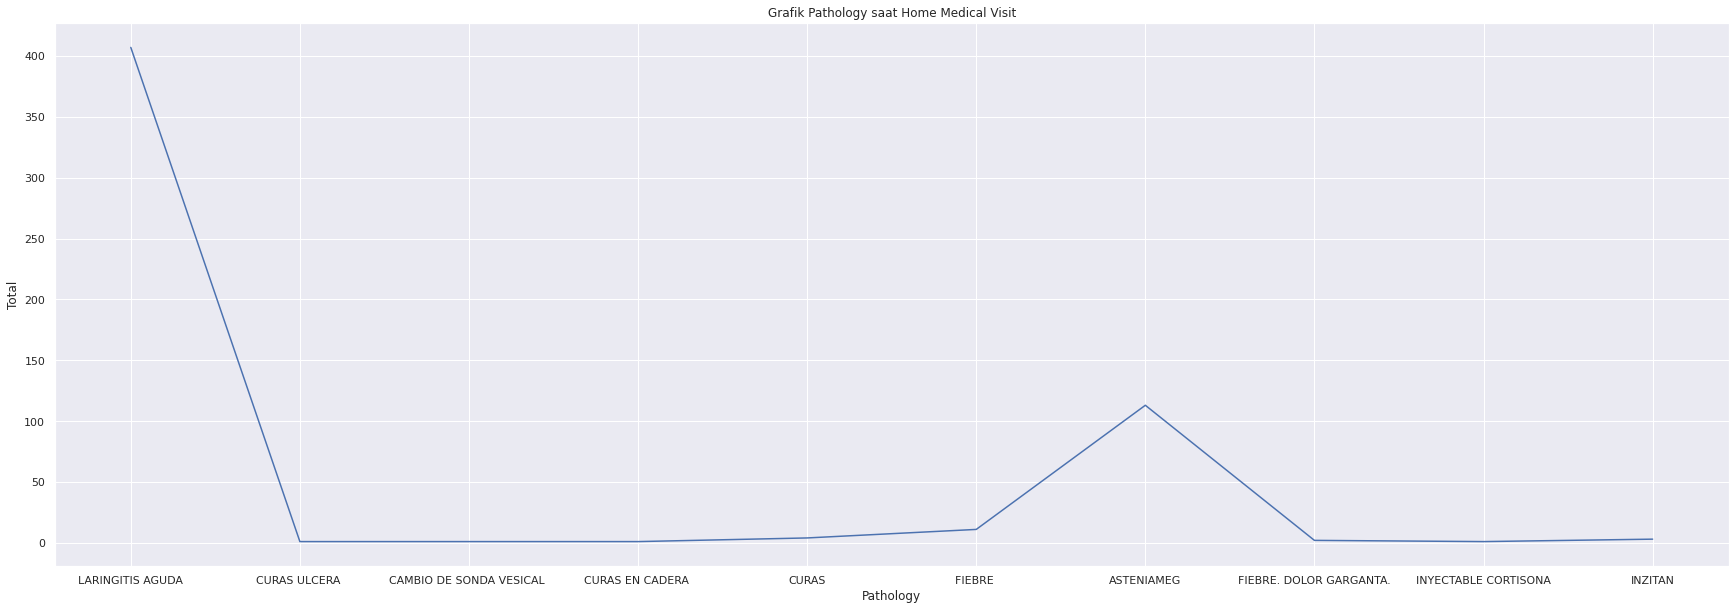

In [ ]:
datadate = df["pathology"].unique()
data = []

for c in datadate:
    d = df[df["pathology"] == c]
    counts = d["non attendance"].count()
    data.append([c, counts])

data = pd.DataFrame(data, columns = ["Pathology", "Total"])
get = data.head(10)

plt.figure(figsize=(30,10))
plt.title("Grafik Pathology saat Home Medical Visit")
ax = sns.lineplot(x="Pathology", y="Total", data=get, sort=True)

Berdasarkan Line Chart diatas, dapat disimpulkan bahwa Pathology **Laringitis Aguda** atau dalam bahasa indonesia adalah **Laringitis Akut**

# Box Plot

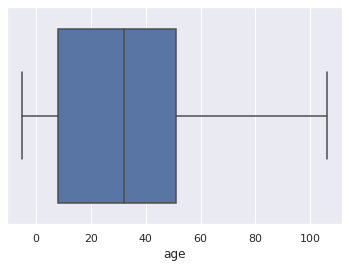

In [ ]:
sns.boxplot(x=df['age'])

Dari data Box Plot diatas, fitur *age* ini tidak memiliki data ourliers. 

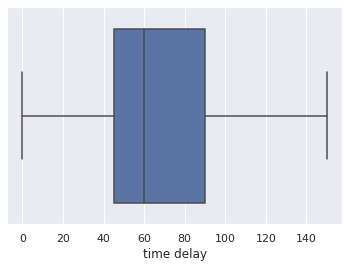

In [ ]:
sns.boxplot(x=df['time delay'])

pada fitur *time delay* tidak memiliki data outliers. Dapat disimpulkan bahwa keterlambatan paling lama adalah lebih dari 140 menit

# Heat Map

,visit status,time delay,city_id,age,code,type_id,personal_id,non attendance,minor
visit status,1.000000,-0.146431,-0.025222,0.004418,-0.012454,NaN,-0.070960,NaN,0.008996
time delay,-0.146431,1.000000,0.122455,0.010684,0.043316,NaN,0.196688,NaN,0.006403
city_id,-0.025222,0.122455,1.000000,0.085871,0.431628,NaN,0.239061,NaN,0.069094
age,0.004418,0.010684,0.085871,1.000000,-0.023984,NaN,0.052419,NaN,0.757222
code,-0.012454,0.043316,0.431628,-0.023984,1.000000,NaN,0.082096,NaN,-0.015713
type_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personal_id,-0.070960,0.196688,0.239061,0.052419,0.082096,NaN,1.000000,NaN,0.041928
non attendance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minor,0.008996,0.006403,0.069094,0.757222,-0.015713,NaN,0.041928,NaN,1.000000


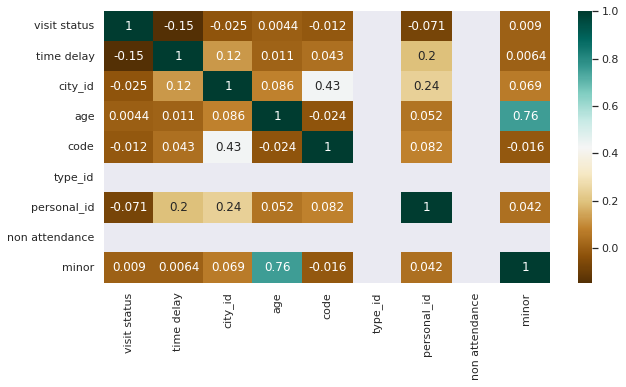

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

**time delay** kurang memiliki pengaruh terhadap **visit status**, begitupun sebaliknya. Namun, **age** memiliki pengaruh yang cukup tinggi terhadap **minor**, begitupun sebaliknya.